<h1>SVM</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn
import numpy.random as r
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
#Get data from csv file as dataframe.
USECOLS = ['text', 'label']
df = pd.read_csv('archive/Twitter_ Non-Advert-Tabelle.csv', sep=';', usecols=USECOLS)
df.head()

text  label
0   speak-no-evil monkey Can I Be Honest With You...      1
1  Frau Goebbels early signs of psychosis psychot...      1
2  A lot of work and unfulfilled tasks plunge you...      1
3  Private health insurance delivers value for yo...      1
4  XpertOnline offers you the convenience of view...      1

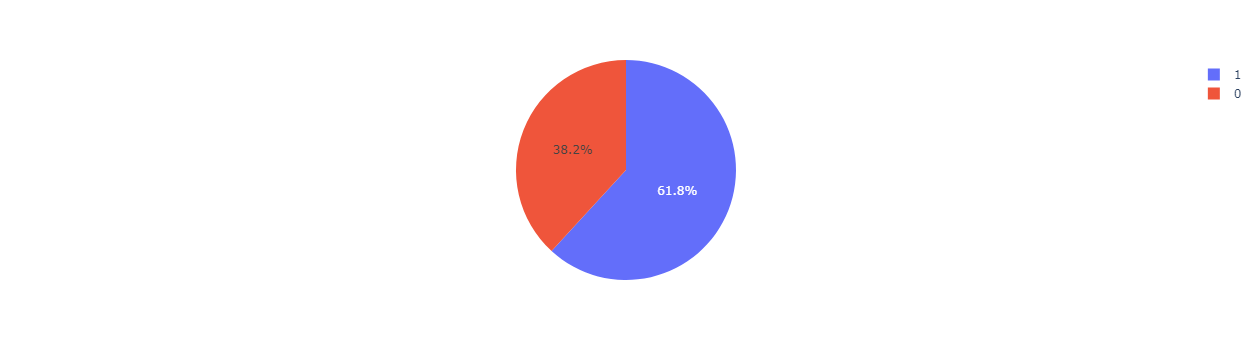

In [3]:
from plotly import express
express.pie(data_frame=df, names='label', color='label')

In [4]:
#Dealing with missing values
df.isnull().sum()
df.fillna('missing', inplace=True)
df.dropna(inplace=True)

In [5]:
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

def preprocess(s):
    table = str.maketrans('', '', string.punctuation)
    s = s.lower().translate(table)
    stemmer = nltk.stem.PorterStemmer()
    s = " ".join([stemmer.stem(word) for word in s.split(" ")])
    return s

In [6]:
#get data as numpy array and split into training and validation sets.
X = df['text'].to_numpy()
y = df['label'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess)
X_train_vector = tfidf_vectorizer.fit_transform(X_train)
X_test_vector = tfidf_vectorizer.transform(X_test)
#convert training and validation inputs back into ndarray
X_train_tfidf = X_train_vector.toarray()
X_test_tfidf = X_test_vector.toarray()

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)




(1640, 7103)
(411, 7103)


In [88]:
from sklearn.svm import SVC # "Support vector classifier"
#Initialize c values to be tested
c_values = [0.1, 1, 10, 100, 1000, 10000]

In [270]:
%%time
linear_val_acc = []
linear_train_acc = []
linear_precision = []
linear_recall = []
linear_fscore = []


def linear_svm(c, X_train, y_train, X_val, y_val):
    clf = SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_pred)
    print("C = " + str(c))
    print("Training Accuracy: " + str(train_acc))
    print("Validation Accuracy: " + str(val_acc))
    print(classification_report(y_train, y_train_pred, digits=5))
    print(classification_report(y_val, y_pred, digits=5))
    precision, recall, fscore,_ = precision_recall_fscore_support(y_val, y_pred)
    linear_train_acc.append(train_acc)
    linear_val_acc.append(val_acc)
    linear_precision.append(precision)
    linear_recall.append(recall)
    linear_fscore.append(fscore)
    

          
print("Linear Kernel:")
for c in c_values:
    linear_svm(c, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("______________")



Linear Kernel:
C = 0.1
Training Accuracy: 0.6420731707317073
Validation Accuracy: 0.683698296836983
              precision    recall  f1-score   support

           0    0.78022   0.11129   0.19479       638
           1    0.63396   0.98004   0.76989      1002

    accuracy                        0.64207      1640
   macro avg    0.70709   0.54566   0.48234      1640
weighted avg    0.69086   0.64207   0.54616      1640

              precision    recall  f1-score   support

           0    0.80000   0.13793   0.23529       145
           1    0.67617   0.98120   0.80061       266

    accuracy                        0.68370       411
   macro avg    0.73808   0.55957   0.51795       411
weighted avg    0.71985   0.68370   0.60117       411

C = 1
Training Accuracy: 0.9573170731707317
Validation Accuracy: 0.8223844282238443
              precision    recall  f1-score   support

           0    0.95367   0.93574   0.94462       638
           1    0.95957   0.97106   0.96528      1002

In [271]:
%%time
rbf_val_acc = []
rbf_train_acc = []
rbf_precision = []
rbf_recall = []
rbf_fscore = []

def rbf_svm(c, X_train, y_train, X_val, y_val):
    clf = SVC(kernel='rbf', C=c)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_pred)
    print("C = " + str(c))
    print("Training Accuracy: " + str(train_acc))
    print("Validation Accuracy: " + str(val_acc))
    print(classification_report(y_train, y_train_pred, digits=5))
    print(classification_report(y_val, y_pred, digits=5))
    precision, recall, fscore,_ = precision_recall_fscore_support(y_val, y_pred)
    rbf_train_acc.append(train_acc)
    rbf_val_acc.append(val_acc)
    rbf_precision.append(precision)
    rbf_recall.append(recall)
    rbf_fscore.append(fscore)
          
print("RBF Kernel:")
for c in c_values:
    rbf_svm(c, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("______________")

RBF Kernel:
C = 0.1
Training Accuracy: 0.6298780487804878
Validation Accuracy: 0.6642335766423357
              precision    recall  f1-score   support

           0    0.71831   0.07994   0.14386       638
           1    0.62588   0.98004   0.76391      1002

    accuracy                        0.62988      1640
   macro avg    0.67209   0.52999   0.45388      1640
weighted avg    0.66184   0.62988   0.52269      1640

              precision    recall  f1-score   support

           0    0.70588   0.08276   0.14815       145
           1    0.66244   0.98120   0.79091       266

    accuracy                        0.66423       411
   macro avg    0.68416   0.53198   0.46953       411
weighted avg    0.67776   0.66423   0.56414       411

C = 1
Training Accuracy: 0.9865853658536585
Validation Accuracy: 0.8345498783454988
              precision    recall  f1-score   support

           0    0.96809   0.99843   0.98302       638
           1    0.99898   0.97904   0.98891      1002



In [272]:
%%time
poly_val_acc = []
poly_train_acc = []
poly_precision = []
poly_recall = []
poly_fscore = []

def poly_svm(c, X_train, y_train, X_val, y_val):
    clf = SVC(kernel='rbf', C=c)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_pred)
    print("C = " + str(c))
    print("Training Accuracy: " + str(train_acc))
    print("Validation Accuracy: " + str(val_acc))
    print(classification_report(y_train, y_train_pred, digits=5))
    print(classification_report(y_val, y_pred, digits=5))
    precision, recall, fscore,_ = precision_recall_fscore_support(y_val, y_pred)
    poly_train_acc.append(train_acc)
    poly_val_acc.append(val_acc)
    poly_precision.append(precision)
    poly_recall.append(recall)
    poly_fscore.append(fscore)
          
print("Polynomial Kernel:")
for c in c_values:
    poly_svm(c, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("______________")

Polynomial Kernel:
C = 0.1
Training Accuracy: 0.6298780487804878
Validation Accuracy: 0.6642335766423357
              precision    recall  f1-score   support

           0    0.71831   0.07994   0.14386       638
           1    0.62588   0.98004   0.76391      1002

    accuracy                        0.62988      1640
   macro avg    0.67209   0.52999   0.45388      1640
weighted avg    0.66184   0.62988   0.52269      1640

              precision    recall  f1-score   support

           0    0.70588   0.08276   0.14815       145
           1    0.66244   0.98120   0.79091       266

    accuracy                        0.66423       411
   macro avg    0.68416   0.53198   0.46953       411
weighted avg    0.67776   0.66423   0.56414       411

C = 1
Training Accuracy: 0.9865853658536585
Validation Accuracy: 0.8345498783454988
              precision    recall  f1-score   support

           0    0.96809   0.99843   0.98302       638
           1    0.99898   0.97904   0.98891     

Text(0, 0.5, 'Accuracy')

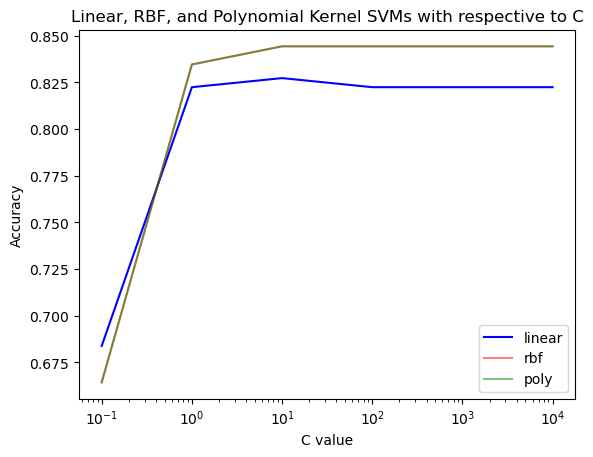

In [11]:
plt.plot(c_values, linear_val_acc, 'b-', label='linear')
plt.plot(c_values, rbf_val_acc, 'r-', label='rbf', alpha=0.5)
plt.plot(c_values, poly_val_acc, 'g-', label='poly', alpha=0.5)
plt.legend(loc='lower right')
plt.title('Linear, RBF, and Polynomial Kernel SVMs with respective to C')
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')


In [12]:
#Runs k-fold cross validation for each kernel using C=10
for k in range(2,11):
    clf = SVC(kernel='linear', C=10)
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv=k)
    predict = cross_val_predict(clf, X_train_tfidf, y_train)
    print('linear', k)
    print(scores)
    print(np.average(scores))
    print(accuracy_score(y_train, predict))
    

    clf = SVC(kernel='rbf', C=10)
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv=k)
    print('rbf', k)
    print(scores)
    print(np.average(scores))
    print(accuracy_score(y_train, predict))

    clf = SVC(kernel='poly', C=10)
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv=k)
    print('poly', k)
    print(scores)
    print(np.average(scores))
    print(accuracy_score(y_train, predict))



linear 2
[0.75609756 0.79512195]
0.775609756097561
0.8048780487804879
rbf 2
[0.77073171 0.79878049]
0.7847560975609756
0.8048780487804879
poly 2
[0.64390244 0.67317073]
0.6585365853658537
0.8048780487804879
linear 3
[0.79159049 0.78427788 0.79304029]
0.78963622199454
0.8048780487804879
rbf 3
[0.79890311 0.78793419 0.81501832]
0.8006185364503464
0.8048780487804879
poly 3
[0.64899452 0.65996344 0.68681319]
0.6652570464270647
0.8048780487804879
linear 4
[0.8        0.76829268 0.81707317 0.77560976]
0.7902439024390244
0.8048780487804879
rbf 4
[0.80243902 0.76097561 0.82682927 0.82195122]
0.8030487804878048
0.8048780487804879
poly 4
[0.66097561 0.64146341 0.67317073 0.68536585]
0.6652439024390244
0.8048780487804879
linear 5
[0.81097561 0.79268293 0.81097561 0.82317073 0.78658537]
0.804878048780488
0.8048780487804879
rbf 5
[0.81097561 0.79268293 0.80487805 0.81402439 0.82926829]
0.8103658536585365
0.8048780487804879
poly 5
[0.6554878  0.65853659 0.67378049 0.69207317 0.68902439]
0.6737804878

<h1>Neural Network</h1>

In [135]:
import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from IPython.display import clear_output
from keras import optimizers
from keras.models import load_model9885
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix

In [122]:
#data structure for storing NN result information
class Metrics(Callback):
    def train_begin(self, logs={}):
        self.val_f1 = []
        self.val_recall = []
        self.val_precision = []
    
    def epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0])).round())
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
     
        print (" — val_f1: %f — val_precision: %f — val_recall %f" % (_val_f1, _val_precision, _val_recall))
        return
    
metrics = Metrics()

def build_nn(nin, nh, nout, nhl, act):
    model = Sequential();
    for x in range(0,nhl):
        model.add(Dense(nh, input_shape=(nin,), activation=act, name="hidden"+str(x)))
    #sigmoid used bc of binary classifacti
    model.add(Dense(nout, activation="sigmoid", name="output"))  
    # Compile model
    opt = optimizers.Adam(learning_rate=0.001) 
    model.compile(optimizer=opt, 
             loss="binary_crossentropy",
             metrics=["accuracy"])  
    return model

#train and validate NN
def train_nn(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), callbacks=[metrics], verbose=1)
    return history

def plot_acc(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    
def plot_loss(history, title):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['acc', 'val_acc'], loc='upper right')
    plt.show()

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6095 - loss: 0.6684 - val_accuracy: 0.6472 - val_loss: 0.6407
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5983 - loss: 0.6564 - val_accuracy: 0.6472 - val_loss: 0.6333
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6304 - loss: 0.6258 - val_accuracy: 0.6472 - val_loss: 0.6219
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6309 - loss: 0.6130 - val_accuracy: 0.6642 - val_loss: 0.6127
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6298 - loss: 0.6005 - val_accuracy: 0.6667 - val_loss: 0.6053
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6294 - loss: 0.5842 - val_accuracy: 0.6667 - val_loss: 0.5923
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6585 - loss: 0.5608 - val_accuracy: 0.6837 - val_loss: 0.5844
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7110 - loss: 0.5415 - val_accuracy: 0.6983 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,131,505 (8.13 MB)

 Trainable params: 710,501 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,421,004 (5.42 MB)

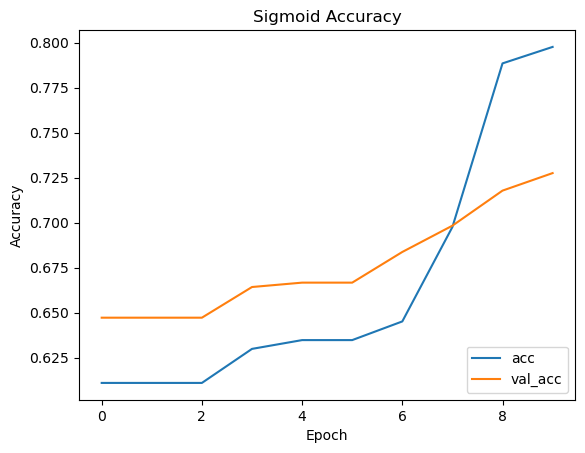

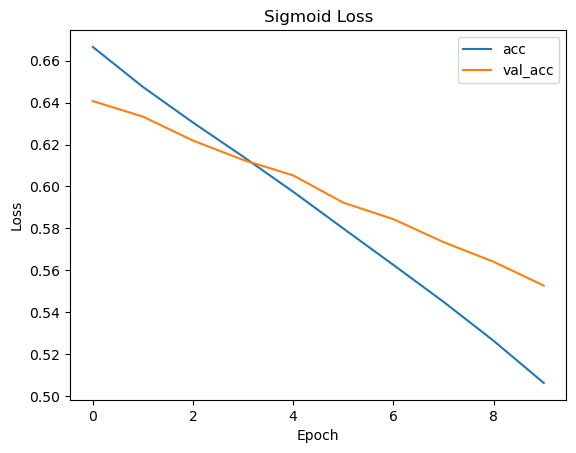

Validation Accuracy = 0.727494


In [123]:
K.clear_session()

modelArr = []
historyArr = []
modelNameArr = []
# Number of nodes in input layer = number of features = 8
nin = X_train_tfidf.shape[1];
# Number of hidden layer nodes
nh = 100;
# Number of output nodes
nout = 1;


model_sig = build_nn(nin, nh, nout, 1, "sigmoid")
sig_history = train_nn(model_sig, X_train_tfidf, y_train, X_test_tfidf, y_test);
model_sig.summary()
plot_acc(sig_history, "Sigmoid Accuracy")
plot_loss(sig_history, "Sigmoid Loss")

modelArr.append(model_sig)
historyArr.append(sig_history)
modelNameArr.append("sigmoid")

score, acc = model_sig.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Validation Accuracy = %f" % acc)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 710,501 (2.71 MB)

 Trainable params: 710,501 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6063 - loss: 0.6838 - val_accuracy: 0.6667 - val_loss: 0.6432
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6427 - loss: 0.6247 - val_accuracy: 0.6934 - val_loss: 0.5934
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7303 - loss: 0.5543 - val_accuracy: 0.7591 - val_loss: 0.5454
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8598 - loss: 0.4670 - val_accuracy: 0.7932 - val_loss: 0.5005
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.3926 - val_accuracy: 0.7956 - val_loss: 0.4639
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9394 - loss: 0.3126 - val_accuracy: 0.8127 - val_loss: 0.4369
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.2496 - val_accuracy: 0.8200 - val_loss: 0.4173
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9805 - loss: 0.1931 - val_accuracy: 0.8200 - val_los

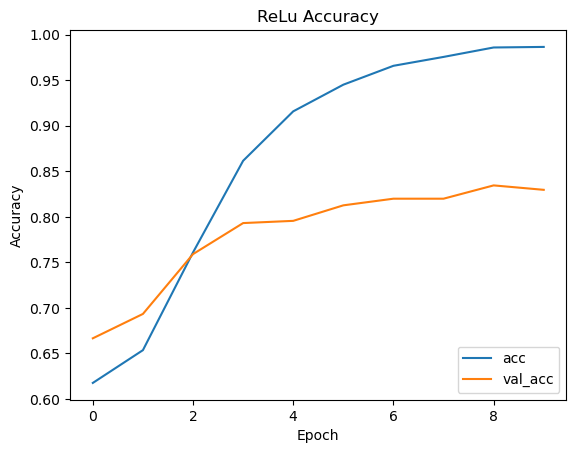

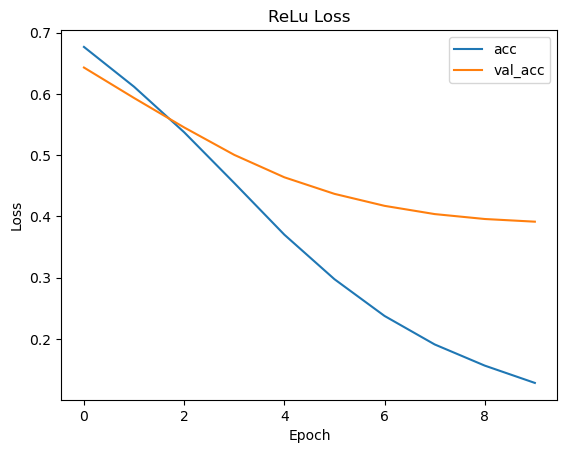

Accuracy = 0.829684


In [124]:
nh = 100;
    
model_relu = build_nn(nin, nh, nout, 1, "relu")
model_relu.summary()
relu_history = train_nn(model_relu, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(relu_history, "ReLu Accuracy")
plot_loss(relu_history, "ReLu Loss")

modelArr.append(model_relu)
historyArr.append(relu_history)
modelNameArr.append("relu")

score, acc = model_relu.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 710,501 (2.71 MB)

 Trainable params: 710,501 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6140 - loss: 0.6767 - val_accuracy: 0.6691 - val_loss: 0.6143
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6377 - loss: 0.5906 - val_accuracy: 0.7032 - val_loss: 0.5650
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7440 - loss: 0.5049 - val_accuracy: 0.7591 - val_loss: 0.5235
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8699 - loss: 0.4239 - val_accuracy: 0.7908 - val_loss: 0.4871
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9237 - loss: 0.3527 - val_accuracy: 0.8029 - val_loss: 0.4553
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9545 - loss: 0.2793 - val_accuracy: 0.8127 - val_loss: 0.4317
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9677 - loss: 0.2353 - val_accuracy: 0.8200 - val_loss: 0.4150
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9791 - loss: 0.1828 - val_accuracy: 0.8224 - val_loss

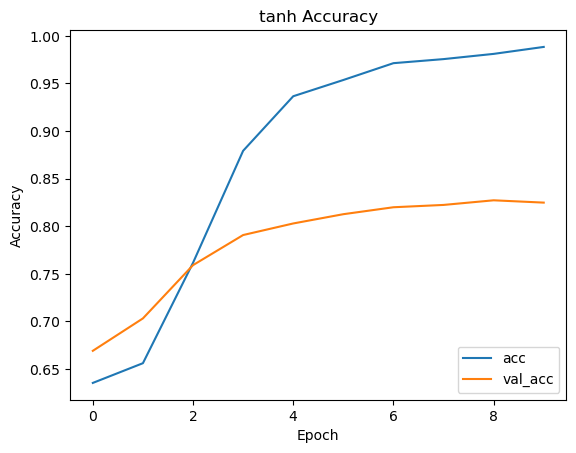

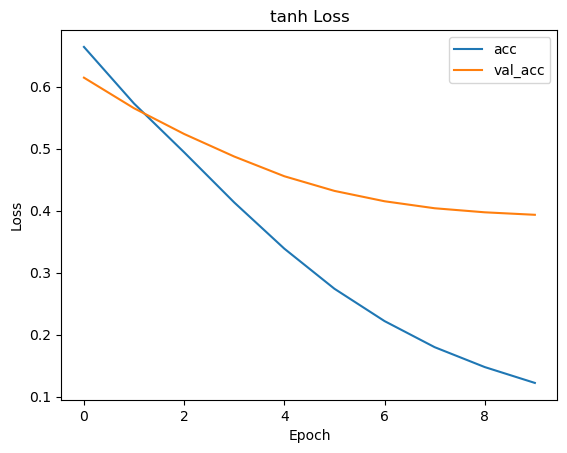

Accuracy = 0.824818


In [125]:
nh = 100;
    
model_tanh = build_nn(nin, nh, nout, 1, "tanh")
model_tanh.summary()
tanh_history = train_nn(model_tanh, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(tanh_history, "tanh Accuracy")
plot_loss(tanh_history, "tanh Loss")

modelArr.append(model_tanh)
historyArr.append(tanh_history)
modelNameArr.append("tanh")

score, acc = model_tanh.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 10)             │        71,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,491 (279.26 KB)

 Trainable params: 71,491 (279.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4167 - loss: 0.7009 - val_accuracy: 0.6472 - val_loss: 0.6848
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6108 - loss: 0.6835 - val_accuracy: 0.6472 - val_loss: 0.6672
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - loss: 0.6726 - val_accuracy: 0.6472 - val_loss: 0.6580
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6229 - loss: 0.6655 - val_accuracy: 0.6472 - val_loss: 0.6538
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6054 - loss: 0.6708 - val_accuracy: 0.6472 - val_loss: 0.6528
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - loss: 0.6667 - val_accuracy: 0.6472 - val_loss: 0.6520
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6175 - loss: 0.6654 - val_accuracy: 0.6472 - val_loss: 0.6523
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 0.6675 - val_accuracy: 0.6472 - val_loss

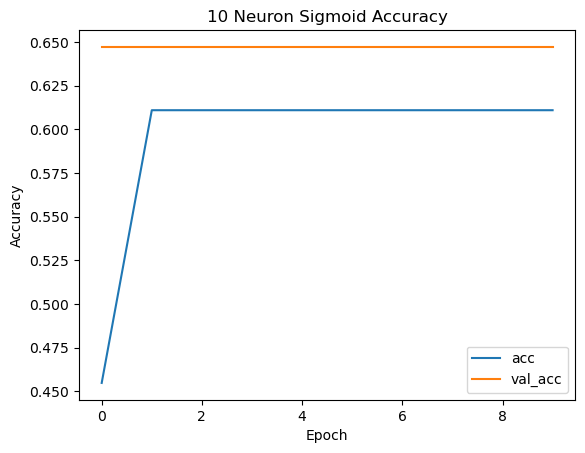

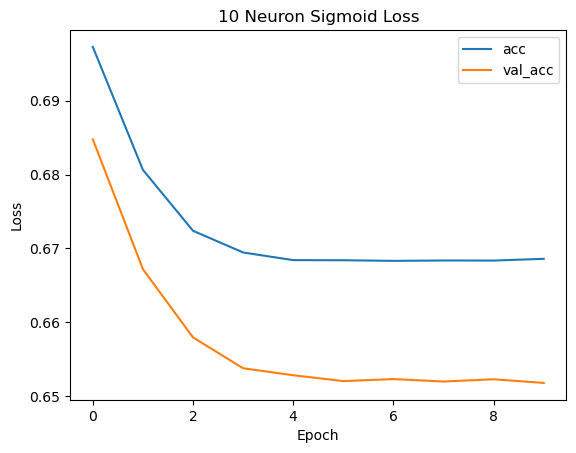

Accuracy = 0.647202


In [126]:
nh = 10;
    
ten_sigmoid = build_nn(nin, nh, nout, nl, "sigmoid")
ten_sigmoid.summary()
tens_history = train_nn(ten_sigmoid, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(tens_history, "10 Neuron Sigmoid Accuracy")
plot_loss(tens_history, "10 Neuron Sigmoid Loss")

modelArr.append(ten_sigmoid)
historyArr.append(tens_history)
modelNameArr.append("10 neuron sigmoid")

score, acc = ten_sigmoid.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 10)             │        71,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,491 (279.26 KB)

 Trainable params: 71,491 (279.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6073 - loss: 0.6905 - val_accuracy: 0.6472 - val_loss: 0.6762
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.6747 - val_accuracy: 0.6472 - val_loss: 0.6501
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 0.6382 - val_accuracy: 0.6472 - val_loss: 0.6121
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6251 - loss: 0.5779 - val_accuracy: 0.6472 - val_loss: 0.5611
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.4953 - val_accuracy: 0.6472 - val_loss: 0.5195
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.4054 - val_accuracy: 0.7470 - val_loss: 0.4940
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9417 - loss: 0.3290 - val_accuracy: 0.7591 - val_loss: 0.5072
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.2705 - val_accuracy: 0.7713 - val_loss

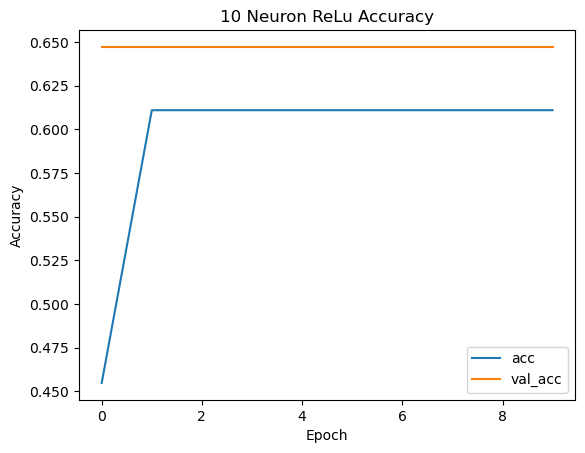

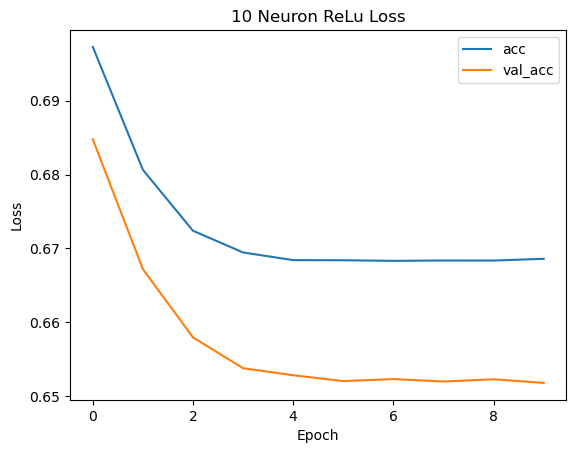

Accuracy = 0.802920


In [127]:
nh = 10;
    
ten_relu = build_nn(nin, nh, nout, nl, "relu")
ten_relu.summary()
tenu_history = train_nn(ten_relu, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(tens_history, "10 Neuron ReLu Accuracy")
plot_loss(tens_history, "10 Neuron ReLu Loss")

modelArr.append(ten_relu)
historyArr.append(tenu_history)
modelNameArr.append("10 neuron relu")

score, acc = ten_relu.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 10)             │        71,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,491 (279.26 KB)

 Trainable params: 71,491 (279.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5932 - loss: 0.6789 - val_accuracy: 0.6472 - val_loss: 0.6282
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6147 - loss: 0.6193 - val_accuracy: 0.6813 - val_loss: 0.5737
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7559 - loss: 0.5061 - val_accuracy: 0.7859 - val_loss: 0.4893
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - loss: 0.3227 - val_accuracy: 0.8151 - val_loss: 0.4206
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9651 - loss: 0.1705 - val_accuracy: 0.8273 - val_loss: 0.4028
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0831 - val_accuracy: 0.8370 - val_loss: 0.4240
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9987 - loss: 0.0403 - val_accuracy: 0.8345 - val_loss: 0.4523
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0239 - val_accuracy: 0.8297 - val_loss

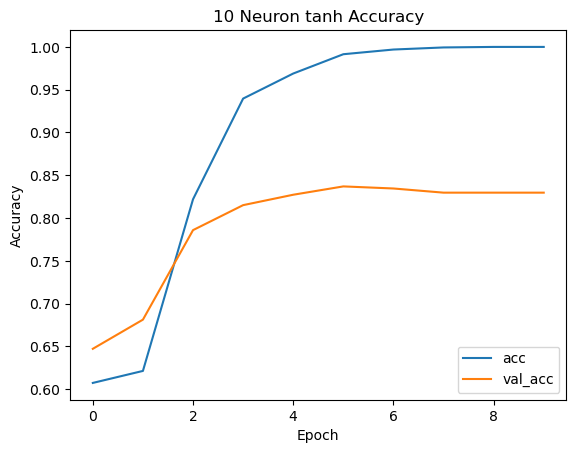

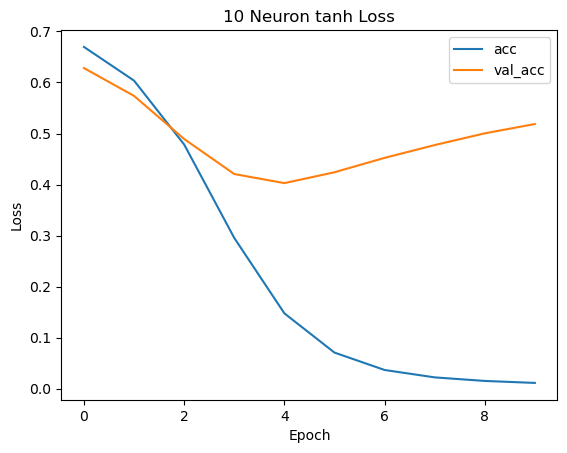

Accuracy = 0.829684


In [128]:
nh = 10;
    
ten_tanh = build_nn(nin, nh, nout, nl, "tanh")
ten_tanh.summary()
tent_history = train_nn(ten_tanh, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(tent_history, "10 Neuron tanh Accuracy")
plot_loss(tent_history, "10 Neuron tanh Loss")

modelArr.append(ten_tanh)
historyArr.append(tent_history)
modelNameArr.append("10 neuron tanh")

score, acc = ten_tanh.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,401 (3.06 MB)

 Trainable params: 801,401 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6101 - loss: 0.6725 - val_accuracy: 0.6472 - val_loss: 0.6498
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6136 - loss: 0.6687 - val_accuracy: 0.6472 - val_loss: 0.6518
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6086 - loss: 0.6701 - val_accuracy: 0.6472 - val_loss: 0.6505
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6254 - loss: 0.6618 - val_accuracy: 0.6472 - val_loss: 0.6540
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5901 - loss: 0.6798 - val_accuracy: 0.6472 - val_loss: 0.6505
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5964 - loss: 0.6837 - val_accuracy: 0.6472 - val_loss: 0.6492
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6222 - loss: 0.6646 - val_accuracy: 0.6472 - val_loss: 0.6588
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6008 - loss: 0.6737 - val_accuracy: 0.6472 - v

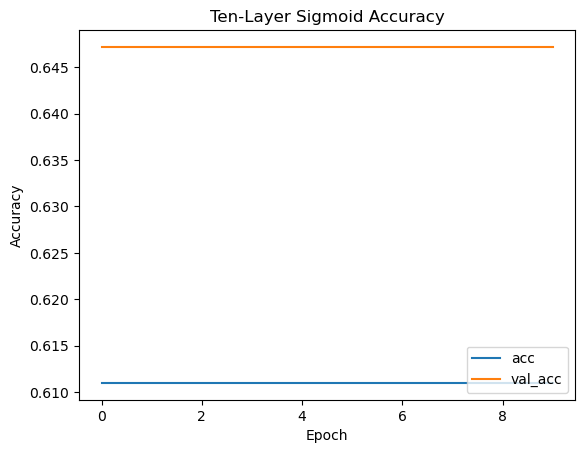

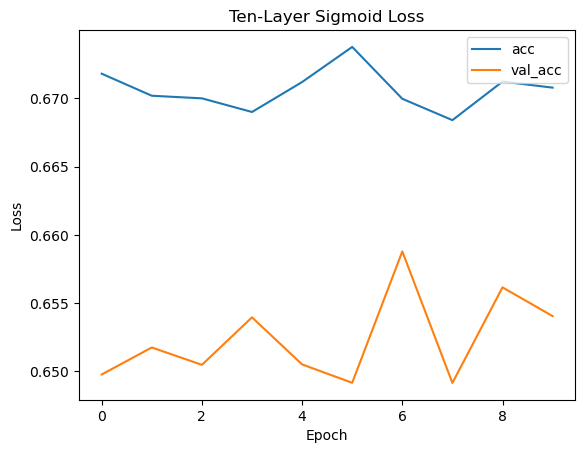

Accuracy = 0.647202


In [129]:
nh = 100;
nl = 10
    
sigmoid_ten = build_nn(nin, nh, nout, nl, "sigmoid")
sigmoid_ten.summary()
sten_history = train_nn(sigmoid_ten, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(sten_history, "Ten-Layer Sigmoid Accuracy")
plot_loss(sten_history, "Ten-Layer Sigmoid Loss")

modelArr.append(sigmoid_ten)
historyArr.append(sten_history)
modelNameArr.append("10 layer sigmoid")

score, acc = sigmoid_ten.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,401 (3.06 MB)

 Trainable params: 801,401 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6196 - loss: 0.6819 - val_accuracy: 0.6472 - val_loss: 0.6230
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5918 - loss: 0.5852 - val_accuracy: 0.6472 - val_loss: 0.5096
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9015 - loss: 0.2990 - val_accuracy: 0.8005 - val_loss: 0.7715
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9743 - loss: 0.2544 - val_accuracy: 0.7883 - val_loss: 0.7631
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9752 - loss: 0.1007 - val_accuracy: 0.8005 - val_loss: 0.8834
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9837 - loss: 0.0582 - val_accuracy: 0.7956 - val_loss: 0.9617
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9897 - loss: 0.0204 - val_accuracy: 0.8175 - val_loss: 1.1857
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9949 - loss: 0.0122 - val_accuracy: 0.8151 - val

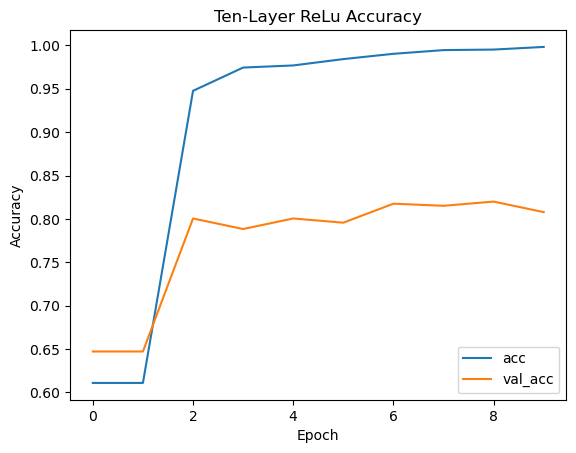

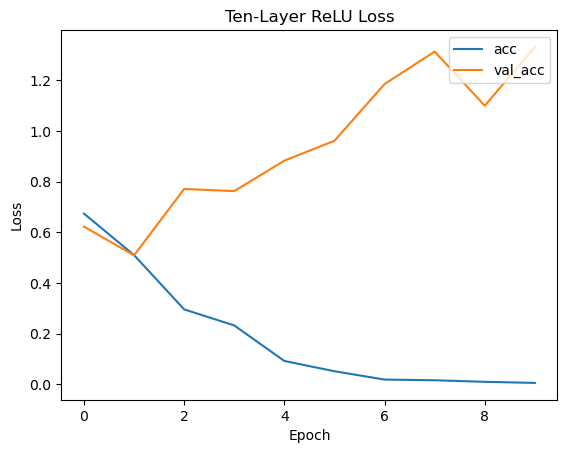

Accuracy = 0.807786


In [130]:
nh = 100;
nl = 10
    
relu_ten = build_nn(nin, nh, nout, nl, "relu")
relu_ten.summary()
rten_history = train_nn(relu_ten, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(rten_history, "Ten-Layer ReLu Accuracy")
plot_loss(rten_history, "Ten-Layer ReLU Loss")

modelArr.append(relu_ten)
historyArr.append(rten_history)
modelNameArr.append("10 layer relu")

score, acc = relu_ten.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden0 (Dense)                 │ (None, 100)            │       710,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,401 (3.06 MB)

 Trainable params: 801,401 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6332 - loss: 0.6346 - val_accuracy: 0.8029 - val_loss: 0.4409
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9484 - loss: 0.1711 - val_accuracy: 0.8151 - val_loss: 0.7420
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9880 - loss: 0.0408 - val_accuracy: 0.8127 - val_loss: 0.6484
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.8127 - val_loss: 0.7915
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9956 - loss: 0.0106 - val_accuracy: 0.8224 - val_loss: 0.8039
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.8151 - val_loss: 0.9298
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.8102 - val_loss: 0.9560
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.0014 - val_accuracy: 0.8078 - val_los

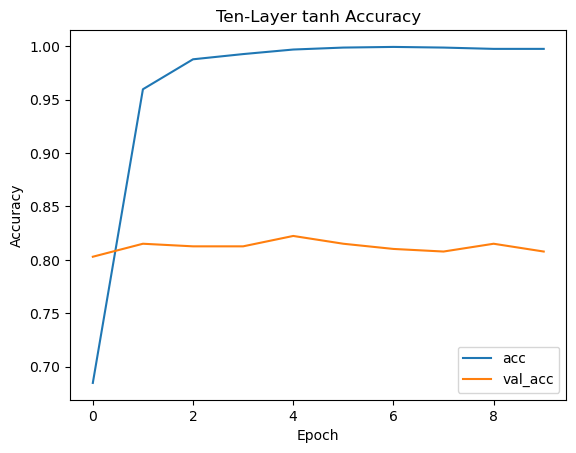

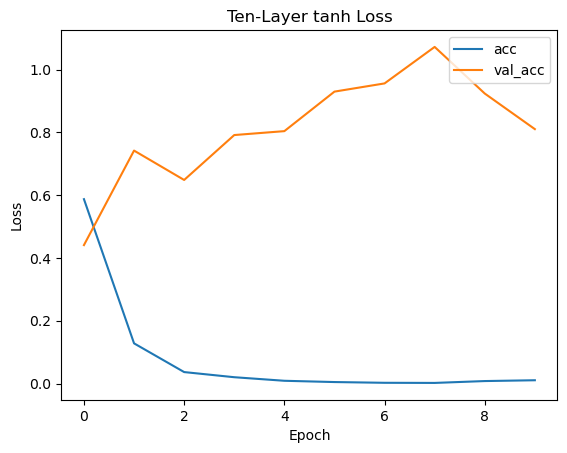

Accuracy = 0.807786


In [131]:
nh = 100;
nl = 10
    
tanh_ten = build_nn(nin, nh, nout, nl, "tanh")
tanh_ten.summary()
tten_history = train_nn(tanh_ten, X_train_tfidf, y_train, X_test_tfidf, y_test);
plot_acc(tten_history, "Ten-Layer tanh Accuracy")
plot_loss(tten_history, "Ten-Layer tanh Loss")

modelArr.append(tanh_ten)
historyArr.append(tten_history)
modelNameArr.append("10 layer tanh")

score, acc = tanh_ten.evaluate(X_test_tfidf, y_test, verbose = 0)
print("Accuracy = %f" % acc)

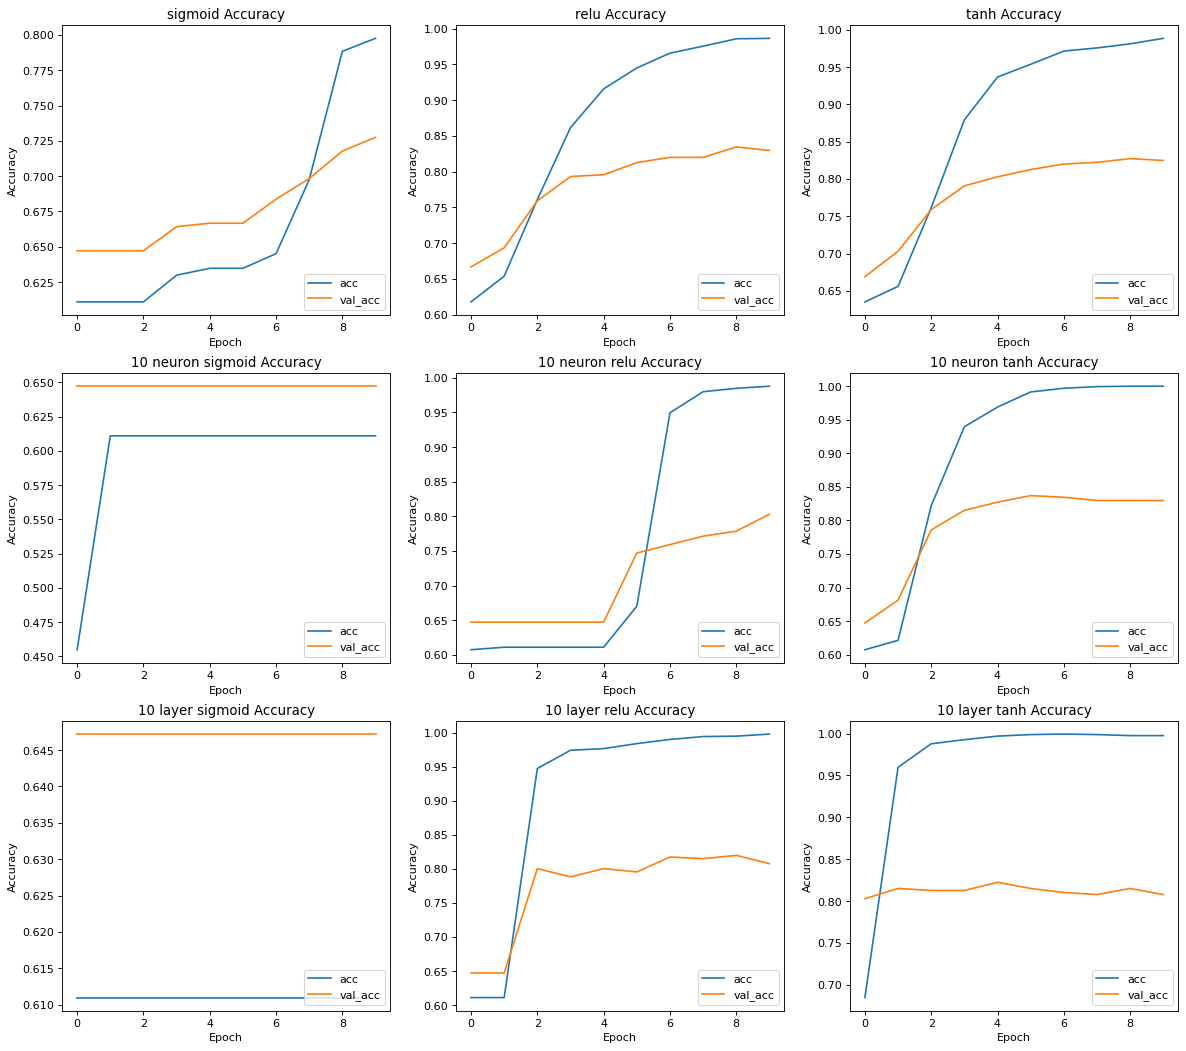

In [132]:
#plot all acc graphs side by side
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.tight_layout()

for index, history in enumerate(historyArr):
    plt.subplot(3,3,index+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(modelNameArr[index] + " Accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['acc', 'val_acc'], loc='lower right')

plt.show()

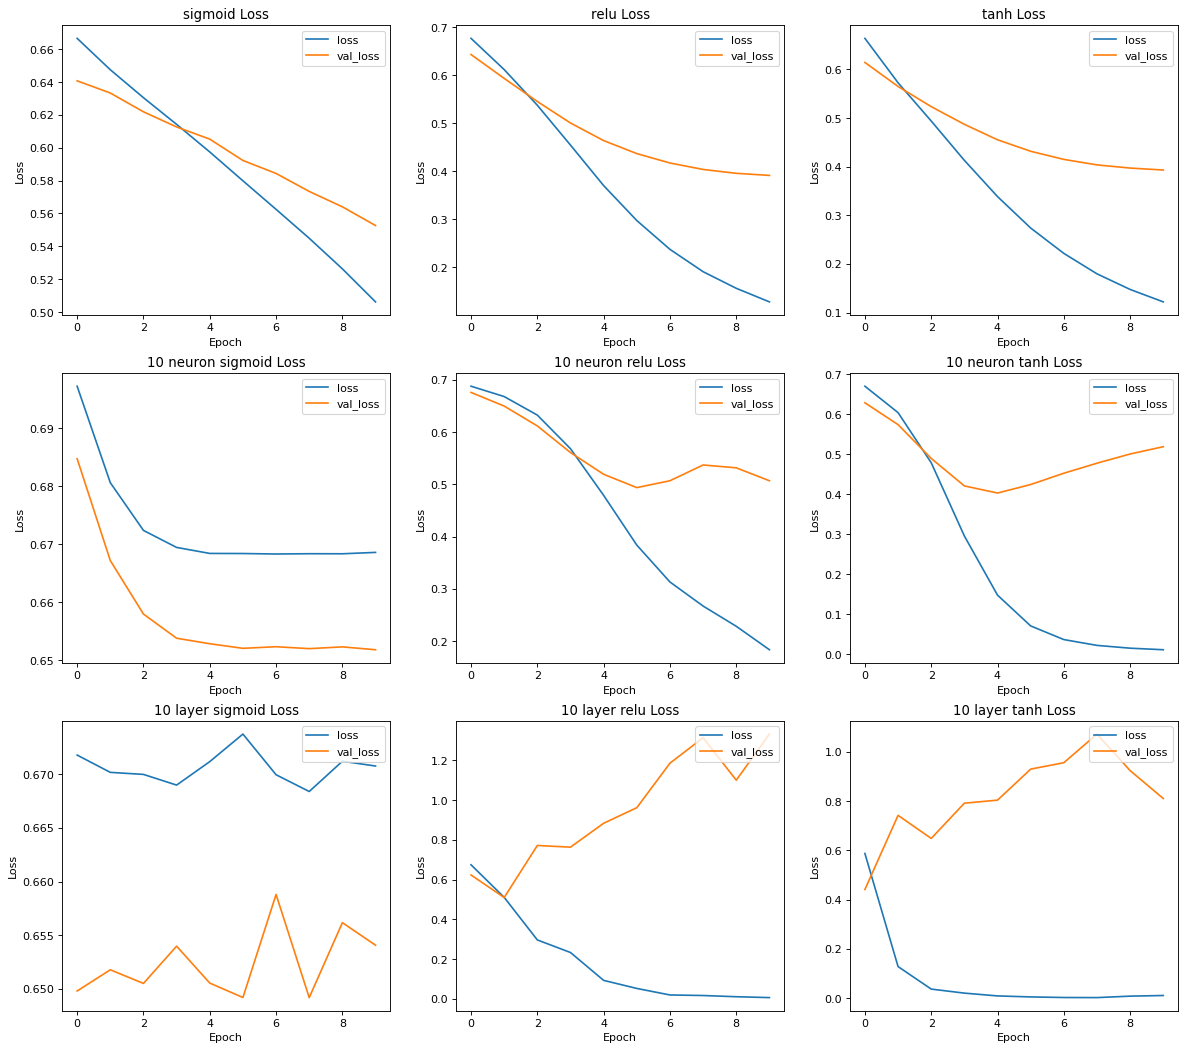

In [133]:
#plot all loss graphs
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.tight_layout()

for index, history in enumerate(historyArr):
    plt.subplot(3,3,index+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(modelNameArr[index] + " Loss")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val_loss'], loc='upper right')

plt.show()

In [142]:
for index, model in enumerate(modelArr):
    score, acc = model.evaluate(X_test_tfidf, y_test, verbose = 0)
    print(modelNameArr[index] + " Validation Accuracy = " + "{:.10%}".format(acc))

print('\n')

for index, history in enumerate(historyArr):
    
    print(modelNameArr[index] + " Train Accuracy = " + 
          "{:.3%}".format(history.history["accuracy"][9]))

sigmoid Validation Accuracy = 72.7493941784%
relu Validation Accuracy = 82.9683721066%
tanh Validation Accuracy = 82.4817538261%
10 neuron sigmoid Validation Accuracy = 64.7201955318%
10 neuron relu Validation Accuracy = 80.2919685841%
10 neuron tanh Validation Accuracy = 82.9683721066%
10 layer sigmoid Validation Accuracy = 64.7201955318%
10 layer relu Validation Accuracy = 80.7785868645%
10 layer tanh Validation Accuracy = 80.7785868645%


sigmoid Train Accuracy = 79.756%
relu Train Accuracy = 98.659%
tanh Train Accuracy = 98.841%
10 neuron sigmoid Train Accuracy = 61.098%
10 neuron relu Train Accuracy = 98.780%
10 neuron tanh Train Accuracy = 100.000%
10 layer sigmoid Train Accuracy = 61.098%
10 layer relu Train Accuracy = 99.817%
10 layer tanh Train Accuracy = 99.756%
